# 高斯过程回归笔记
## 1 所需库


In [39]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from scipy.spatial.distance import cdist
import sklearn.gaussian_process.kernels as kernels

## 2 要点
已知训练数据$D = \left( {{\rm X},y} \right) = \left\{ {({{\rm X}_i},{y_i})|i = 1,2,...,N} \right\}$，其中${\rm X}$为输入，$y$为输出。

现新输入${\rm X}'$，预测$y'$。

首先选取协方差函数$K$。

对于预测值$y$与输入值$y'$，

假设回归的函数服从高斯过程，有$\left[ \begin{array}{l}
y\\
y'
\end{array} \right] \sim N(0,\left[ {\begin{array}{*{20}{c}}
{K(X,X)}&{K(X,X')}\\
{K(X',X)}&{K(X',X')}
\end{array}} \right]),$

根据多维高斯条件分布性质，有$\left[ \begin{array}{l}
a\\
b
\end{array} \right]\sim N(\left[ \begin{array}{l}
{\mu _a}\\
{\mu _b}
\end{array} \right],\left[ {\begin{array}{*{20}{c}}
A&C\\
{{C^T}}&B
\end{array}} \right]),$ 得$a|b\sim N({\mu _a} + C{B^{ - 1}}(b - {\mu _b}),A - C{B^{ - 1}}{C^T}),$

代入上式即可求得$y'$在$y$条件下的概率，即$y'|y\sim N(K(X',X)K{(X,X)^{ - 1}}y,K(X',X') - K(X',X)K{(X,X)^{ - 1}}K(X,X'))$




## 3 代码
### 3.1 随机生成训练集数据

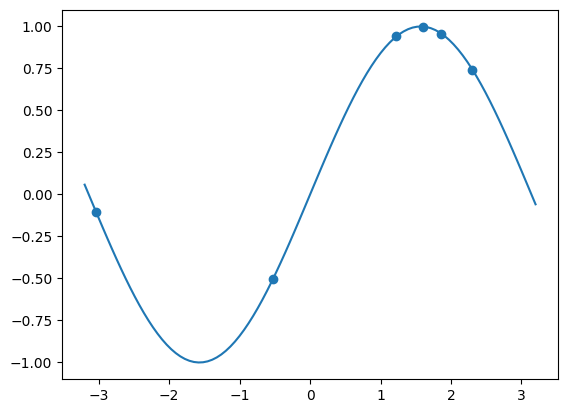

In [46]:
x_training = np.random.random(size=6)
x_training = x_training * 6.28 - 3.14
y_training = np.sin(x_training)
x_linspace = np.linspace(-3.2,3.2,100)
plt.scatter(x_training, y_training)
plt.plot(x_linspace, np.sin(x_linspace))
plt.show()

### 3.2 核函数定义
在sklearn库中选取各种核函数，RBF即高斯核函数为最常用的核函数，即$K(X,X') = {e^{ - \frac{{{{({d_{X - X'}})}^2}}}{{2{\sigma ^2}}}}}。$

In [47]:
def kernel_function(x1,x2):
    if x1.ndim == 1 and x2.ndim == 1:
        x1 = x1.reshape(-1, 1)
        x2 = x2.reshape(-1, 1)
    kernel=kernels.RBF()
    return kernel(x1,x2)

### 3.3 计算
分别计算$K(X,X)$,$K(X',X)$,$K(X',X')$,$K(X,X')$,

In [48]:
K_X_X = kernel_function(x_training, x_training)
K_Xp_X = kernel_function(x_linspace, x_training)
K_Xp_Xp = kernel_function(x_linspace, x_linspace)
K_X_X_inv = np.linalg.inv(K_X_X)

根据公式，均值函数$y'=K(X',X)K{(X,X)^{ - 1}}y$，

In [49]:
#预测均值函数(mean)
y_predict = K_Xp_X.dot(K_X_X_inv).dot(y_training)

高维高斯分布协方差矩阵$C=K(X',X') - K(X',X)K{(X,X)^{ - 1}}K(X,X')$，其中某一个$y'$的方差$\sigma$即为该矩阵的对角线上的元素。

In [50]:
#协方差矩阵
cov = K_Xp_Xp - K_Xp_X.dot(K_X_X_inv).dot(K_Xp_X.T)

#标准差矩阵
std = np.sqrt(cov.diagonal())

将预测曲线（即均值函数）与实际曲线绘制，概率预测绘制20%，40%，60%，80%，95%的置信区间，颜色越深代表概率密度越大。

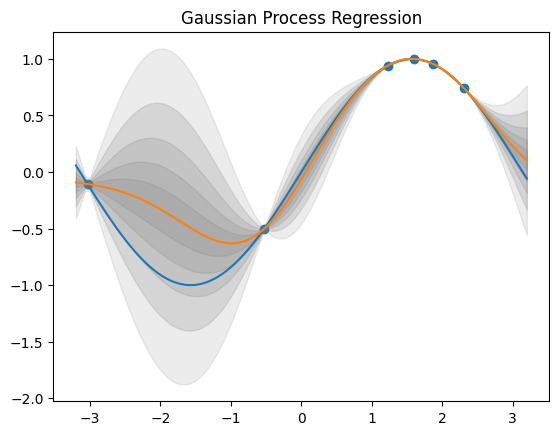

In [51]:
plt.plot(x_linspace, np.sin(x_linspace))
plt.scatter(x_training, y_training)
plt.plot(x_linspace, y_predict)
plt.title("Gaussian Process Regression")

c = [0.26,0.53,0.85,1.29,1.95]  #标准正态分布置信区间
for i in range(4):
    plt.fill_between(x_linspace, y_predict - c[i] * std, y_predict + c[i] * std, color='gray', alpha=0.2)
plt.fill_between(x_linspace, y_predict - c[4] * std, y_predict + c[4] * std, color='gray', alpha=0.15)

plt.show()